In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

In [2]:
acc_rs1h = np.load('npy_data/acc_data1h.npy')
acc_s1h = np.load('npy_data/search_data1h.npy')
acc_rs2h = np.load('npy_data/acc_data2h.npy')
acc_s2h = np.load('npy_data/search_data2h.npy')
acc_rs5h = np.load('npy_data/acc_data5h.npy')
acc_s5h = np.load('npy_data/search_data5h.npy')
acc_rs1k = np.load('npy_data/acc_data1k.npy')
acc_s1k = np.load('npy_data/search_data1k.npy')

In [3]:
acc_ch1h = np.load('npy_data/choose_best1h_1.npy')
acc_rn1h = np.load('npy_data/choose_random1h_1.npy')
acc_ch2h = np.load('npy_data/choose_best2h_1.npy')
acc_rn2h = np.load('npy_data/choose_random2h_1.npy')
acc_ch5h = np.load('npy_data/choose_best5h.npy')
acc_rn5h = np.load('npy_data/choose_random5h.npy')
acc_ch1k = np.load('npy_data/choose_best1k_1.npy')
acc_rn1k = np.load('npy_data/choose_random1k_1.npy')

In [61]:
#This was my attempt at trying to fit a SVM Classifier to show decision boundaries
#x1h = np.array(np.vstack((acc_ch1h[0]-acc_ch1h[1], acc_rn1h[0]-acc_rn1h[1], acc_rs1h[:,0]-acc_rs1h[:,1])),
  #          np.vstack((-acc_ch1h[2], -acc_rn1h[2], acc_s1h)))
x1h1 = np.zeros(50)
x1h2 = np.zeros(50)
x1h1[0:10] = acc_ch1h[0]-acc_ch1h[1]
x1h1[10:20] = acc_rn1h[0]-acc_rn1h[1]
x1h1[20:] = acc_rs1h[:,0]-acc_rs1h[:,1]
x1h2[0:10] = -acc_ch1h[2]
x1h2[10:20] = -acc_rn1h[2]
x1h2[20:] = acc_s1h
x1h = np.c_[x1h1, x1h2]
y1h = np.zeros(50)
y1h[0:10] = 0
y1h[10:20] = 1
y1h[20:] = 2
shuffle = np.arange(50)
shuffle = np.random.shuffle(shuffle)
x1h = x1h[shuffle]
y1h = y1h[shuffle]
clf1h = SVC(gamma='auto')
clf1h.fit(x1h, y1h.reshape(-1,1))
xx, yy = np.meshgrid(np.arange(-0.1, 0.6, 0.01),
                     np.arange(0.5, 1.1, 0.01))

# here "model" is your model's prediction (classification) function
Z = clf1h.predict(np.c_[xx.ravel(), yy.ravel()]) 

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, colors=['orange','g','b'])

# Plot also the training points
plt.scatter(acc_ch1h[0]-acc_ch1h[1], -acc_ch1h[2], color='orange', label='Best Choice', edgecolor='black')
plt.scatter(acc_rn1h[0]-acc_rn1h[1], -acc_rn1h[2], color='g', label="Random Choice", edgecolor='black')
plt.scatter(acc_rs1h[:,0]-acc_rs1h[:,1], acc_s1h, color='b', label='Random Search', edgecolor='black')
plt.xlim(-0.1, 0.55)
plt.ylim(0.5, 1.05)
plt.xlabel('Overfit')
plt.ylabel('Accuacy')
plt.title('100 Samples')

ValueError: Found array with dim 3. Estimator expected <= 2.

<Figure size 864x2880 with 0 Axes>

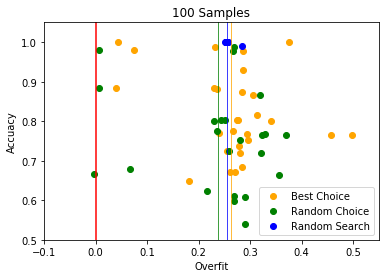

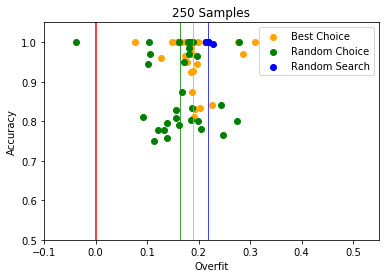

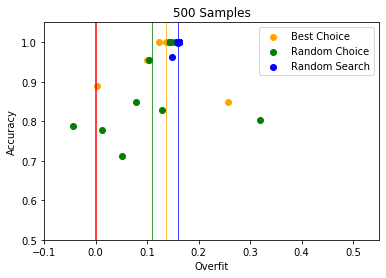

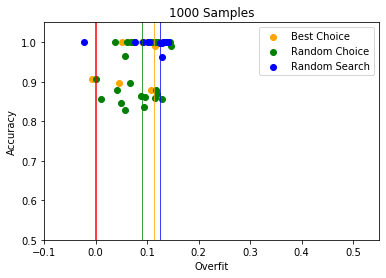

In [17]:
plt.figure(figsize=(12, 40))
plt.subplots(1, 1)
plt.scatter(acc_ch1h[0]-acc_ch1h[1], -acc_ch1h[2], color='orange', label='Best Choice')
plt.scatter(acc_rn1h[0]-acc_rn1h[1], -acc_rn1h[2], color='g', label="Random Choice")
plt.scatter(acc_rs1h[:,0]-acc_rs1h[:,1], acc_s1h, color='b', label='Random Search')
plt.xlim(-0.1, 0.55)
plt.ylim(0.5, 1.05)
plt.xlabel('Overfit')
plt.ylabel('Accuacy')
plt.title('100 Samples')
plt.axvline(0, color='r')
plt.axvline((acc_ch1h[0].sum()-acc_ch1h[1].sum())/30, color='orange', linewidth=0.75)
plt.axvline((acc_rn1h[0].sum()-acc_rn1h[1].sum())/30, color='g', linewidth=0.75)
plt.axvline((acc_rs1h[:,0].sum()-acc_rs1h[:,1].sum())/30, color='b', linewidth=0.75)
plt.legend()

plt.subplots(1,1)
plt.scatter(acc_ch2h[0]-acc_ch2h[1], -acc_ch2h[2], color='orange', label='Best Choice')
plt.scatter(acc_rn2h[0]-acc_rn2h[1], -acc_rn2h[2], color='g', label="Random Choice")
plt.scatter(acc_rs2h[:,0]-acc_rs2h[:,1], acc_s2h, color='b', label='Random Search')
plt.xlim(-0.1, 0.55)
plt.ylim(0.5, 1.05)
plt.xlabel('Overfit')
plt.ylabel('Accuracy')
plt.legend()
plt.title('250 Samples')
plt.axvline(0, color='r')
plt.axvline((acc_ch2h[0].sum()-acc_ch2h[1].sum())/30, color='orange', linewidth=0.75)
plt.axvline((acc_rn2h[0].sum()-acc_rn2h[1].sum())/30, color='g', linewidth=0.75)
plt.axvline((acc_rs2h[:,0].sum()-acc_rs2h[:,1].sum())/30, color='b', linewidth=0.75)

plt.subplots(1,1)
plt.scatter(acc_ch5h[0]-acc_ch5h[1], -acc_ch5h[2], color='orange', label='Best Choice')
plt.scatter(acc_rn5h[0]-acc_rn5h[1], -acc_rn5h[2], color='g', label="Random Choice")
plt.scatter(acc_rs5h[:,0]-acc_rs5h[:,1], acc_s5h, color='b', label='Random Search')
plt.xlim(-0.1, 0.55)
plt.ylim(0.5, 1.05)
plt.xlabel('Overfit')
plt.ylabel('Accuracy')
plt.legend()
plt.title('500 Samples')
plt.axvline(0, color='r')
plt.axvline((acc_ch5h[0].sum()-acc_ch5h[1].sum())/acc_ch5h.shape[1], color='orange', linewidth=0.75)
plt.axvline((acc_rn5h[0].sum()-acc_rn5h[1].sum())/acc_rn5h.shape[1], color='g', linewidth=0.75)
plt.axvline((acc_rs5h[:,0].sum()-acc_rs5h[:,1].sum())/30, color='b', linewidth=0.75)

plt.subplots(1,1)
plt.scatter(acc_ch1k[0]-acc_ch1k[1], -acc_ch1k[2], color='orange', label='Best Choice')
plt.scatter(acc_rn1k[0]-acc_rn1k[1], -acc_rn1k[2], color='g', label="Random Choice")
plt.scatter(acc_rs1k[:,0]-acc_rs1k[:,1], acc_s1k, color='b', label='Random Search')
plt.xlim(-0.1, 0.55)
plt.ylim(0.5, 1.05)
plt.xlabel('Overfit')
plt.ylabel('Accuracy')
plt.legend()
plt.title('1000 Samples')
plt.axvline(0, color='r')
plt.axvline((acc_ch1k[0].sum()-acc_ch1k[1].sum())/30, color='orange', linewidth=0.75)
plt.axvline((acc_rn1k[0].sum()-acc_rn1k[1].sum())/30, color='g', linewidth=0.75)
plt.axvline((acc_rs1k[:,0].sum()-acc_rs1k[:,1].sum())/30, color='b', linewidth=0.75)

In [38]:
acc_ovch2h = np.load('npy_data/overlap_ch2h.npy')
acc_ovrn2h = np.load('npy_data/overlap_rn2h.npy')
acc_ovch5h = np.load('npy_data/overlap_ch5h.npy')
acc_ovrn5h = np.load('npy_data/overlap_rn5h.npy')
acc_ovch1k = np.load('npy_data/overlap_ch1k.npy')
acc_ovrn1k = np.load('npy_data/overlap_rn1k.npy')

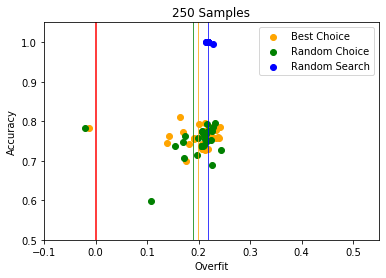

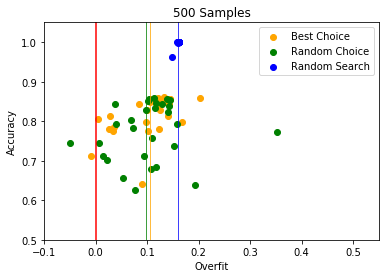

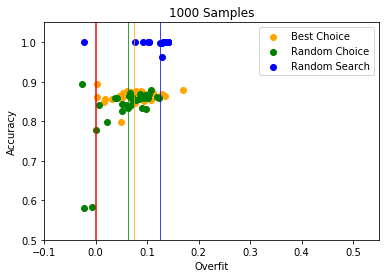

In [40]:
plt.subplots(1,1)
plt.scatter(acc_ovch2h[0]-acc_ovch2h[1], -acc_ovch2h[2], color='orange', label='Best Choice')
plt.scatter(acc_ovrn2h[0]-acc_ovrn2h[1], -acc_ovrn2h[2], color='g', label="Random Choice")
plt.scatter(acc_rs2h[:,0]-acc_rs2h[:,1], acc_s2h, color='b', label='Random Search')
plt.xlim(-0.1, 0.55)
plt.ylim(0.5, 1.05)
plt.xlabel('Overfit')
plt.ylabel('Accuracy')
plt.legend()
plt.title('250 Samples')
plt.axvline(0, color='r')
plt.axvline((acc_ovch2h[0].sum()-acc_ovch2h[1].sum())/acc_ovch2h.shape[1], color='orange', linewidth=0.75)
plt.axvline((acc_ovrn2h[0].sum()-acc_ovrn2h[1].sum())/acc_ovrn2h.shape[1], color='g', linewidth=0.75)
plt.axvline((acc_rs2h[:,0].sum()-acc_rs2h[:,1].sum())/30, color='b', linewidth=0.75)

plt.subplots(1,1)
plt.scatter(acc_ovch5h[0]-acc_ovch5h[1], -acc_ovch5h[2], color='orange', label='Best Choice')
plt.scatter(acc_ovrn5h[0]-acc_ovrn5h[1], -acc_ovrn5h[2], color='g', label="Random Choice")
plt.scatter(acc_rs5h[:,0]-acc_rs5h[:,1], acc_s5h, color='b', label='Random Search')
plt.xlim(-0.1, 0.55)
plt.ylim(0.5, 1.05)
plt.xlabel('Overfit')
plt.ylabel('Accuracy')
plt.legend()
plt.title('500 Samples')
plt.axvline(0, color='r')
plt.axvline((acc_ovch5h[0].sum()-acc_ovch5h[1].sum())/acc_ovch5h.shape[1], color='orange', linewidth=0.75)
plt.axvline((acc_ovrn5h[0].sum()-acc_ovrn5h[1].sum())/acc_ovrn5h.shape[1], color='g', linewidth=0.75)
plt.axvline((acc_rs5h[:,0].sum()-acc_rs5h[:,1].sum())/30, color='b', linewidth=0.75)

plt.subplots(1,1)
plt.scatter(acc_ovch1k[0]-acc_ovch1k[1], -acc_ovch1k[2], color='orange', label='Best Choice')
plt.scatter(acc_ovrn1k[0]-acc_ovrn1k[1], -acc_ovrn1k[2], color='g', label="Random Choice")
plt.scatter(acc_rs1k[:,0]-acc_rs1k[:,1], acc_s1k, color='b', label='Random Search')
plt.xlim(-0.1, 0.55)
plt.ylim(0.5, 1.05)
plt.xlabel('Overfit')
plt.ylabel('Accuracy')
plt.legend()
plt.title('1000 Samples')
plt.axvline(0, color='r')
plt.axvline((acc_ovch1k[0].sum()-acc_ovch1k[1].sum())/acc_ovch1k.shape[1], color='orange', linewidth=0.75)
plt.axvline((acc_ovrn1k[0].sum()-acc_ovrn1k[1].sum())/acc_ovrn1k.shape[1], color='g', linewidth=0.75)
plt.axvline((acc_rs1k[:,0].sum()-acc_rs1k[:,1].sum())/30, color='b', linewidth=0.75)


In [36]:
par_data = np.load('npy_data/par_data5h.npy')
print(par_data)
acc_rs5h

[[  1.521   8.   ]
 [  0.644  54.   ]
 [ 22.125 156.   ]
 [ 24.625 138.   ]
 [ 19.247 126.   ]
 [  5.401 236.   ]
 [ 19.938  50.   ]
 [  4.431  45.   ]
 [ 15.985 160.   ]
 [ 15.893  80.   ]
 [  4.344 100.   ]
 [ 22.189 226.   ]
 [ 24.306 103.   ]
 [ 17.76  240.   ]
 [ 18.714 137.   ]
 [ 17.312  28.   ]
 [ 14.686 202.   ]
 [  2.443 117.   ]
 [  1.795 204.   ]
 [  3.416  25.   ]
 [ 18.107 107.   ]
 [  5.385  30.   ]
 [ 24.559 141.   ]
 [ 22.027 244.   ]
 [  2.509  93.   ]
 [  5.416 125.   ]
 [ 11.545  41.   ]
 [ 24.669  87.   ]
 [ 16.965 169.   ]
 [ 13.066  69.   ]]


array([[0.988     , 0.84      ],
       [1.        , 0.8409    ],
       [1.        , 0.8419    ],
       [1.        , 0.84069999],
       [1.        , 0.8405    ],
       [1.        , 0.8409    ],
       [1.        , 0.8387    ],
       [1.        , 0.83830001],
       [1.        , 0.8375    ],
       [1.        , 0.8383    ],
       [1.        , 0.8388    ],
       [1.        , 0.83869999],
       [1.        , 0.8385    ],
       [1.        , 0.8383    ],
       [1.        , 0.8386    ],
       [1.        , 0.8383    ],
       [1.        , 0.8383    ],
       [1.        , 0.83860001],
       [1.        , 0.8385    ],
       [1.        , 0.8389    ],
       [1.        , 0.8388    ],
       [1.        , 0.83839999],
       [1.        , 0.8388    ],
       [1.        , 0.8385    ],
       [1.        , 0.8391    ],
       [1.        , 0.8388    ],
       [1.        , 0.8394    ],
       [1.        , 0.8388    ],
       [1.        , 0.839     ],
       [1.        , 0.83919999]])

In [35]:
acc_rn1h

array([[ 8.39999996e-01,  9.39999993e-01,  8.79999995e-01,
         3.20000000e-01,  1.00000000e+00,  1.80000003e-01,
         9.49999988e-01,  1.10000000e-01,  8.69999990e-01,
         9.80000005e-01,  4.20000006e-01,  9.69999993e-01,
         1.10000002e-01,  9.89999995e-01,  8.79999994e-01,
         8.79999992e-01,  9.89999995e-01,  8.09999998e-01,
         9.50000005e-01,  1.00000000e+00,  1.00000000e+00,
         2.30000000e-01,  1.80000005e-01,  3.80000001e-01,
         9.39999986e-01,  8.00000005e-01,  1.00000000e+00,
         1.00000000e+00,  8.70000015e-01,  4.49999999e-01],
       [ 5.18200008e-01,  5.83700007e-01,  5.51799994e-01,
         2.58700002e-01,  7.33899999e-01,  1.82500002e-01,
         7.20500000e-01,  1.03200000e-01,  6.53999998e-01,
         7.36600000e-01,  1.29900002e-01,  7.34400001e-01,
         1.03200002e-01,  6.71700003e-01,  6.43700000e-01,
         6.11399999e-01,  7.20400003e-01,  5.40300008e-01,
         6.26000001e-01,  6.78700016e-01,  7.18900002e-